<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<img src="./image/hpart.jpg" alt="hooshpart" style="width: 150px;"/>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تشخیص چهره (Face Detection) با MTCNN</div></center></h1>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from detection.mtcnn import detect_face

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">انتخاب رنگ و ضخامت جعبه‌ای که قرار است دور چهره ها رسم شود.</div>

In [2]:
default_color = (0, 255, 0) #BGR
default_thickness = 2

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود شبکه های کانولوشنالی آموزش دیده شده</div>

In [3]:
with tf.Graph().as_default():
    sess = tf.Session()
    pnet, rnet, onet = detect_face.create_mtcnn(sess, None)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پارامترهای شبکه</div>

In [4]:
minsize = 20 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">خواندن یک تصویر و نمایش آن</div>

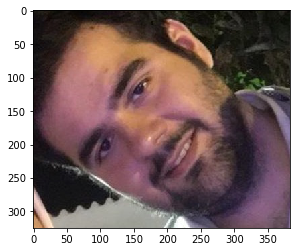

In [6]:
import matplotlib.pyplot as plt
img = plt.imread("./images/m.jpg")
plt.imshow(img)
plt.show()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص نواحی حاوی چهره و landmarkهای چهره</div>

In [7]:
bounding_boxes, points = detect_face.detect_face(img, minsize, pnet, rnet, onet, threshold, factor)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم مربع های تشخیص داده شده برای هر چهره</div>

In [8]:
    for bounding_box in bounding_boxes:
        pts = bounding_box[:4].astype(np.int32)
        pt1 = (pts[0], pts[1])
        pt2 = (pts[2], pts[3])
        cv2.rectangle(img, pt1, pt2, color=default_color, thickness=default_thickness)

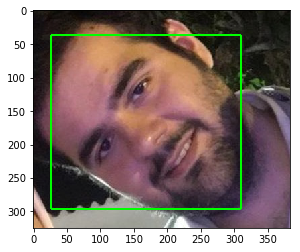

In [9]:
plt.imshow(img)
plt.show()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ترسیم 5 نقطه ی تشخیص داده شده برای هر چهره</div>

In [10]:
    for i in range(points.shape[1]):
        pts = points[:, i].astype(np.int32)
        for j in range(pts.size // 2):
            pt = (pts[j], pts[5 + j])
            cv2.circle(img, center=pt, radius=1, color=default_color, thickness=default_thickness)

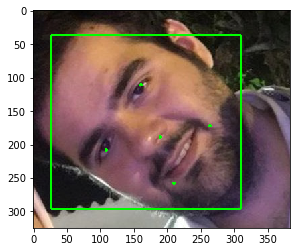

In [11]:
plt.imshow(img)
plt.show()

In [12]:
from skimage import transform as trans


In [14]:
img = plt.imread("./images/m.jpg")
src = np.array([
       [  54.70657349,   73.85186005],
       [ 105.04542542,   73.57342529],
       [  80.03600311,  102.48085785],
       [  59.35614395,  131.95071411],
       [ 101.04272461,  131.72013855]], dtype=np.float32)

In [16]:
landmark = points[:, 0].reshape( (2,5) ).T

dst = landmark.astype(np.float32)
tform = trans.SimilarityTransform()
tform.estimate(dst, src)
M = tform.params[0:2,:]

In [17]:
M

array([[   0.23149038,   -0.41054218,  113.92819341],
       [   0.41054218,    0.23149038,  -17.67408619]])

In [18]:
wrapped = cv2.warpAffine(img,M,(160,160), borderValue = 0.0)

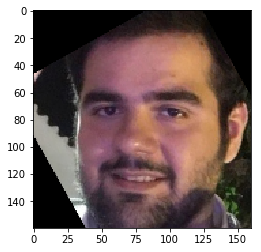

True

In [19]:
plt.imshow(wrapped)
plt.show()
cv2.imwrite("m_w.jpg", wrapped[:,:,-1::-1])

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره تابستانه یادگیری عمیق مرکز تحقیقات هوش پارت<br>علیرضا اخوان پور<br>8 تا 9 شهریور 1397<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>